In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
df = pd.read_csv('Datasets\Polynomial_regression.csv')
df.head()

,Temperature (°C),Pressure (kPa),Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,38068.201283,6.303792e+06,100.000000


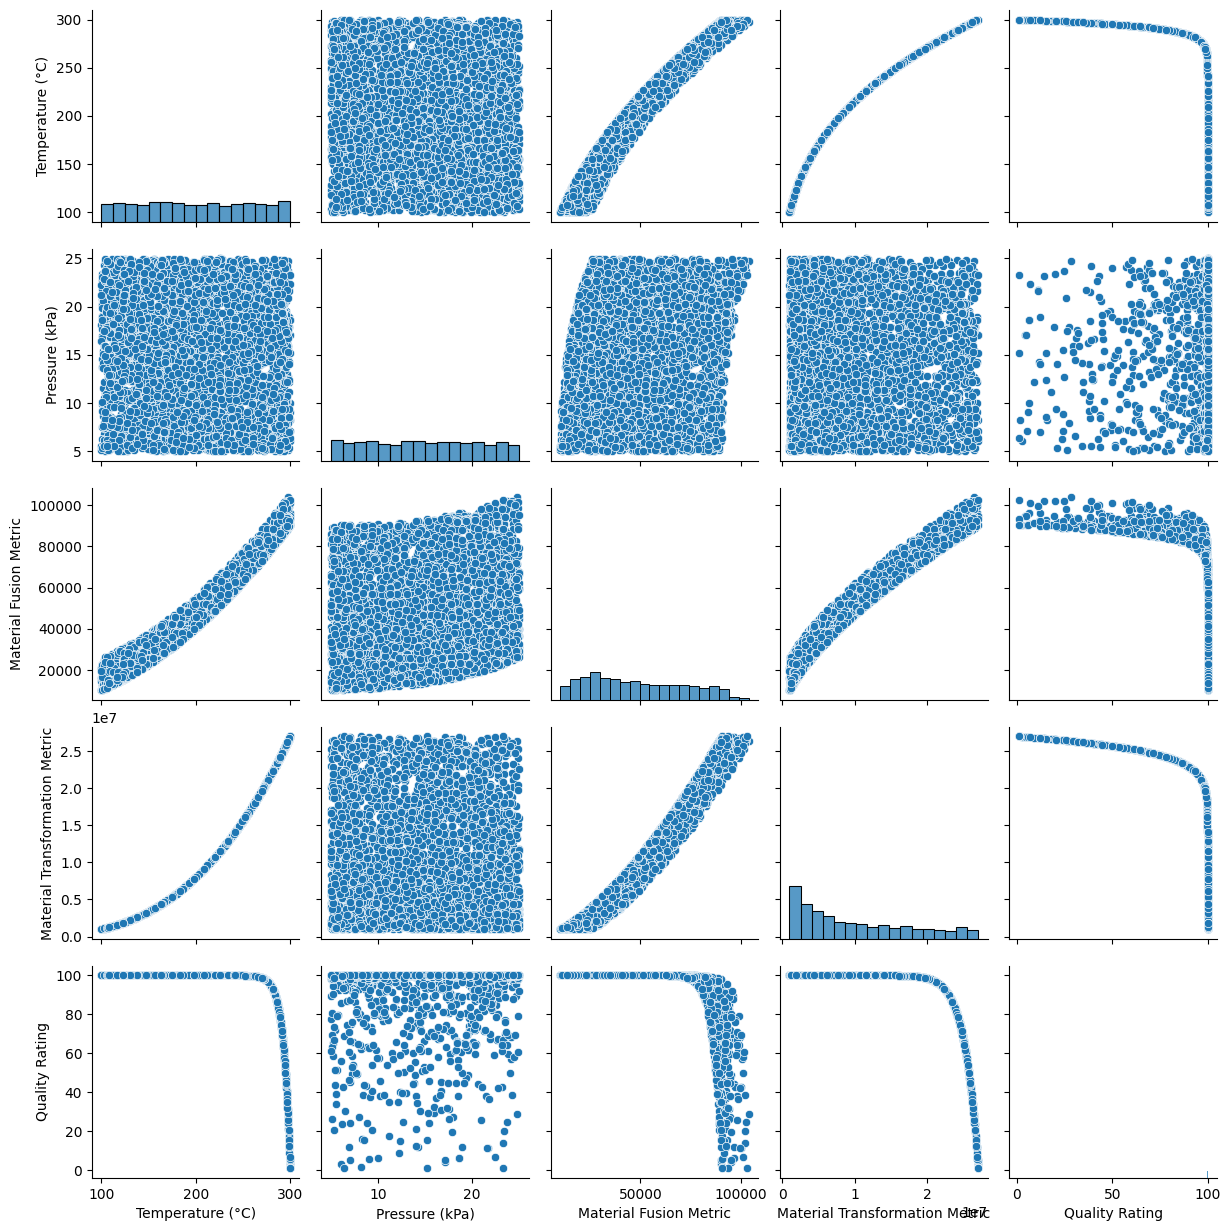

In [44]:
sns.pairplot(df)
plt.show()

In [45]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [46]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4)
pf.fit(x)
x= pf.transform(x)
x

array([[1.00000000e+00, 2.09762701e+02, 8.05085537e+00, ...,
        1.68856220e+23, 3.50043508e+25, 7.25649656e+27],
       [1.00000000e+00, 2.43037873e+02, 1.58120684e+01, ...,
        8.18457157e+23, 1.86434630e+26, 4.24675512e+28],
       [1.00000000e+00, 2.20552675e+02, 7.84313005e+00, ...,
        2.77773575e+23, 6.06616841e+25, 1.32476242e+28],
       ...,
       [1.00000000e+00, 2.41357144e+02, 1.63919104e+01, ...,
        7.76056115e+23, 1.74136943e+26, 3.90740750e+28],
       [1.00000000e+00, 2.09040239e+02, 2.38099362e+01, ...,
        2.72933316e+23, 4.35866743e+25, 6.96066790e+27],
       [1.00000000e+00, 1.63359996e+02, 2.43321329e+01, ...,
        3.20833104e+22, 3.40326600e+24, 3.61004502e+26]])

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(x_test)
dict = {'y_test':y_test, 'y_pred':y_pred}
prediction = pd.DataFrame(dict)
prediction.head(8)

,y_test,y_pred
149,4.052686,15.771518
1025,98.873036,101.428855
2153,96.914933,98.874999
720,99.951543,99.308827
325,99.999999,100.803608
857,99.999998,100.509474
3150,99.999941,99.996242
408,99.999623,99.193615


In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.astype(int)})
df.head(5)

,Actual,Predicted
149,4.052686,15
1025,98.873036,101
2153,96.914933,98
720,99.951543,99
325,99.999999,100


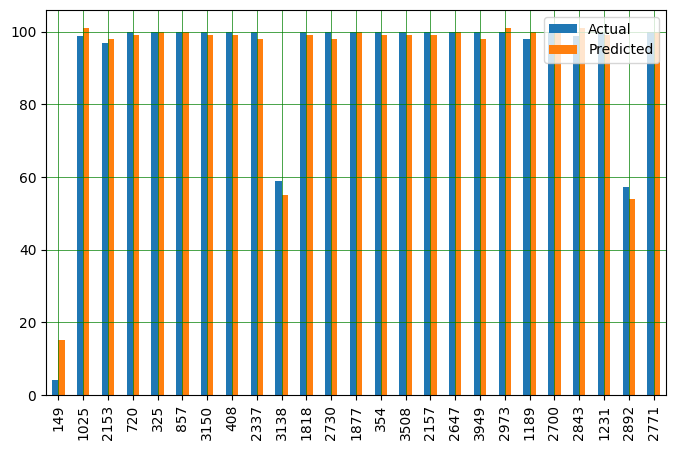

In [51]:
df_1 = df.head(25)
df_1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9838
